In [9]:
import matplotlib.pyplot as plt
import pandas as pd

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S%z')

df = pd.read_csv("ap-northeast-1.csv", parse_dates=[0])
df.columns = ["dt", "arch", "os", "name", "price"]
df.head()

,dt,arch,os,name,price
0,2017-05-08 21:46:36+00:00,c3.8xlarge,Windows,ap-northeast-1c,1.7461
1,2017-05-08 21:46:34+00:00,i3.large,SUSE Linux,ap-northeast-1c,0.1223
2,2017-05-08 21:46:34+00:00,i3.large,Linux/UNIX,ap-northeast-1c,0.0223
3,2017-05-08 21:46:17+00:00,c4.8xlarge,SUSE Linux,ap-northeast-1a,0.7890
4,2017-05-08 21:46:17+00:00,c4.8xlarge,Linux/UNIX,ap-northeast-1a,0.6890


In [11]:
df = df[df.os == "Windows"]
#df = df[df.apply(lambda x: x.arch.startswith("i"), axis=1)]
#len(df.groupby("arch"))
df.groupby("arch").groups.keys()

dict_keys(['c1.medium', 'c1.xlarge', 'c3.2xlarge', 'c3.4xlarge', 'c3.8xlarge', 'c3.large', 'c3.xlarge', 'c4.2xlarge', 'c4.4xlarge', 'c4.8xlarge', 'c4.large', 'c4.xlarge', 'cc2.8xlarge', 'cr1.8xlarge', 'd2.2xlarge', 'd2.4xlarge', 'd2.8xlarge', 'd2.xlarge', 'g2.2xlarge', 'g2.8xlarge', 'hi1.4xlarge', 'i2.2xlarge', 'i2.4xlarge', 'i2.8xlarge', 'i2.xlarge', 'i3.16xlarge', 'i3.2xlarge', 'i3.4xlarge', 'i3.8xlarge', 'i3.large', 'i3.xlarge', 'm1.large', 'm1.medium', 'm1.small', 'm1.xlarge', 'm2.2xlarge', 'm2.4xlarge', 'm2.xlarge', 'm3.2xlarge', 'm3.large', 'm3.medium', 'm3.xlarge', 'm4.10xlarge', 'm4.16xlarge', 'm4.2xlarge', 'm4.4xlarge', 'm4.large', 'm4.xlarge', 'r3.2xlarge', 'r3.4xlarge', 'r3.8xlarge', 'r3.large', 'r3.xlarge', 'r4.16xlarge', 'r4.2xlarge', 'r4.4xlarge', 'r4.8xlarge', 'r4.large', 'r4.xlarge', 't1.micro', 'x1.16xlarge', 'x1.32xlarge'])

In [12]:
#делаю так, потому что через .startswith слишком медленно
df = df[df.arch.isin(['i2.2xlarge', 'i2.4xlarge', 'i2.8xlarge', 'i2.xlarge', 'i3.16xlarge', 'i3.2xlarge', 'i3.4xlarge', 'i3.8xlarge', 'i3.large', 'i3.xlarge',])]
len(df)

22846

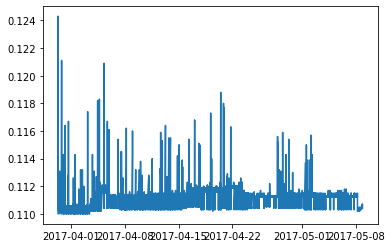

In [15]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#Пробный график
df2 = df[df.arch == "i3.large"]
plt.plot(df2["dt"], df2["price"])
plt.show()

In [34]:
#Оцениваю разброс, очень долго отказывался верить что там есть значения >> 1
import numpy as np
np.min(df.price), np.max(df.price)

(0.11, 89.03)

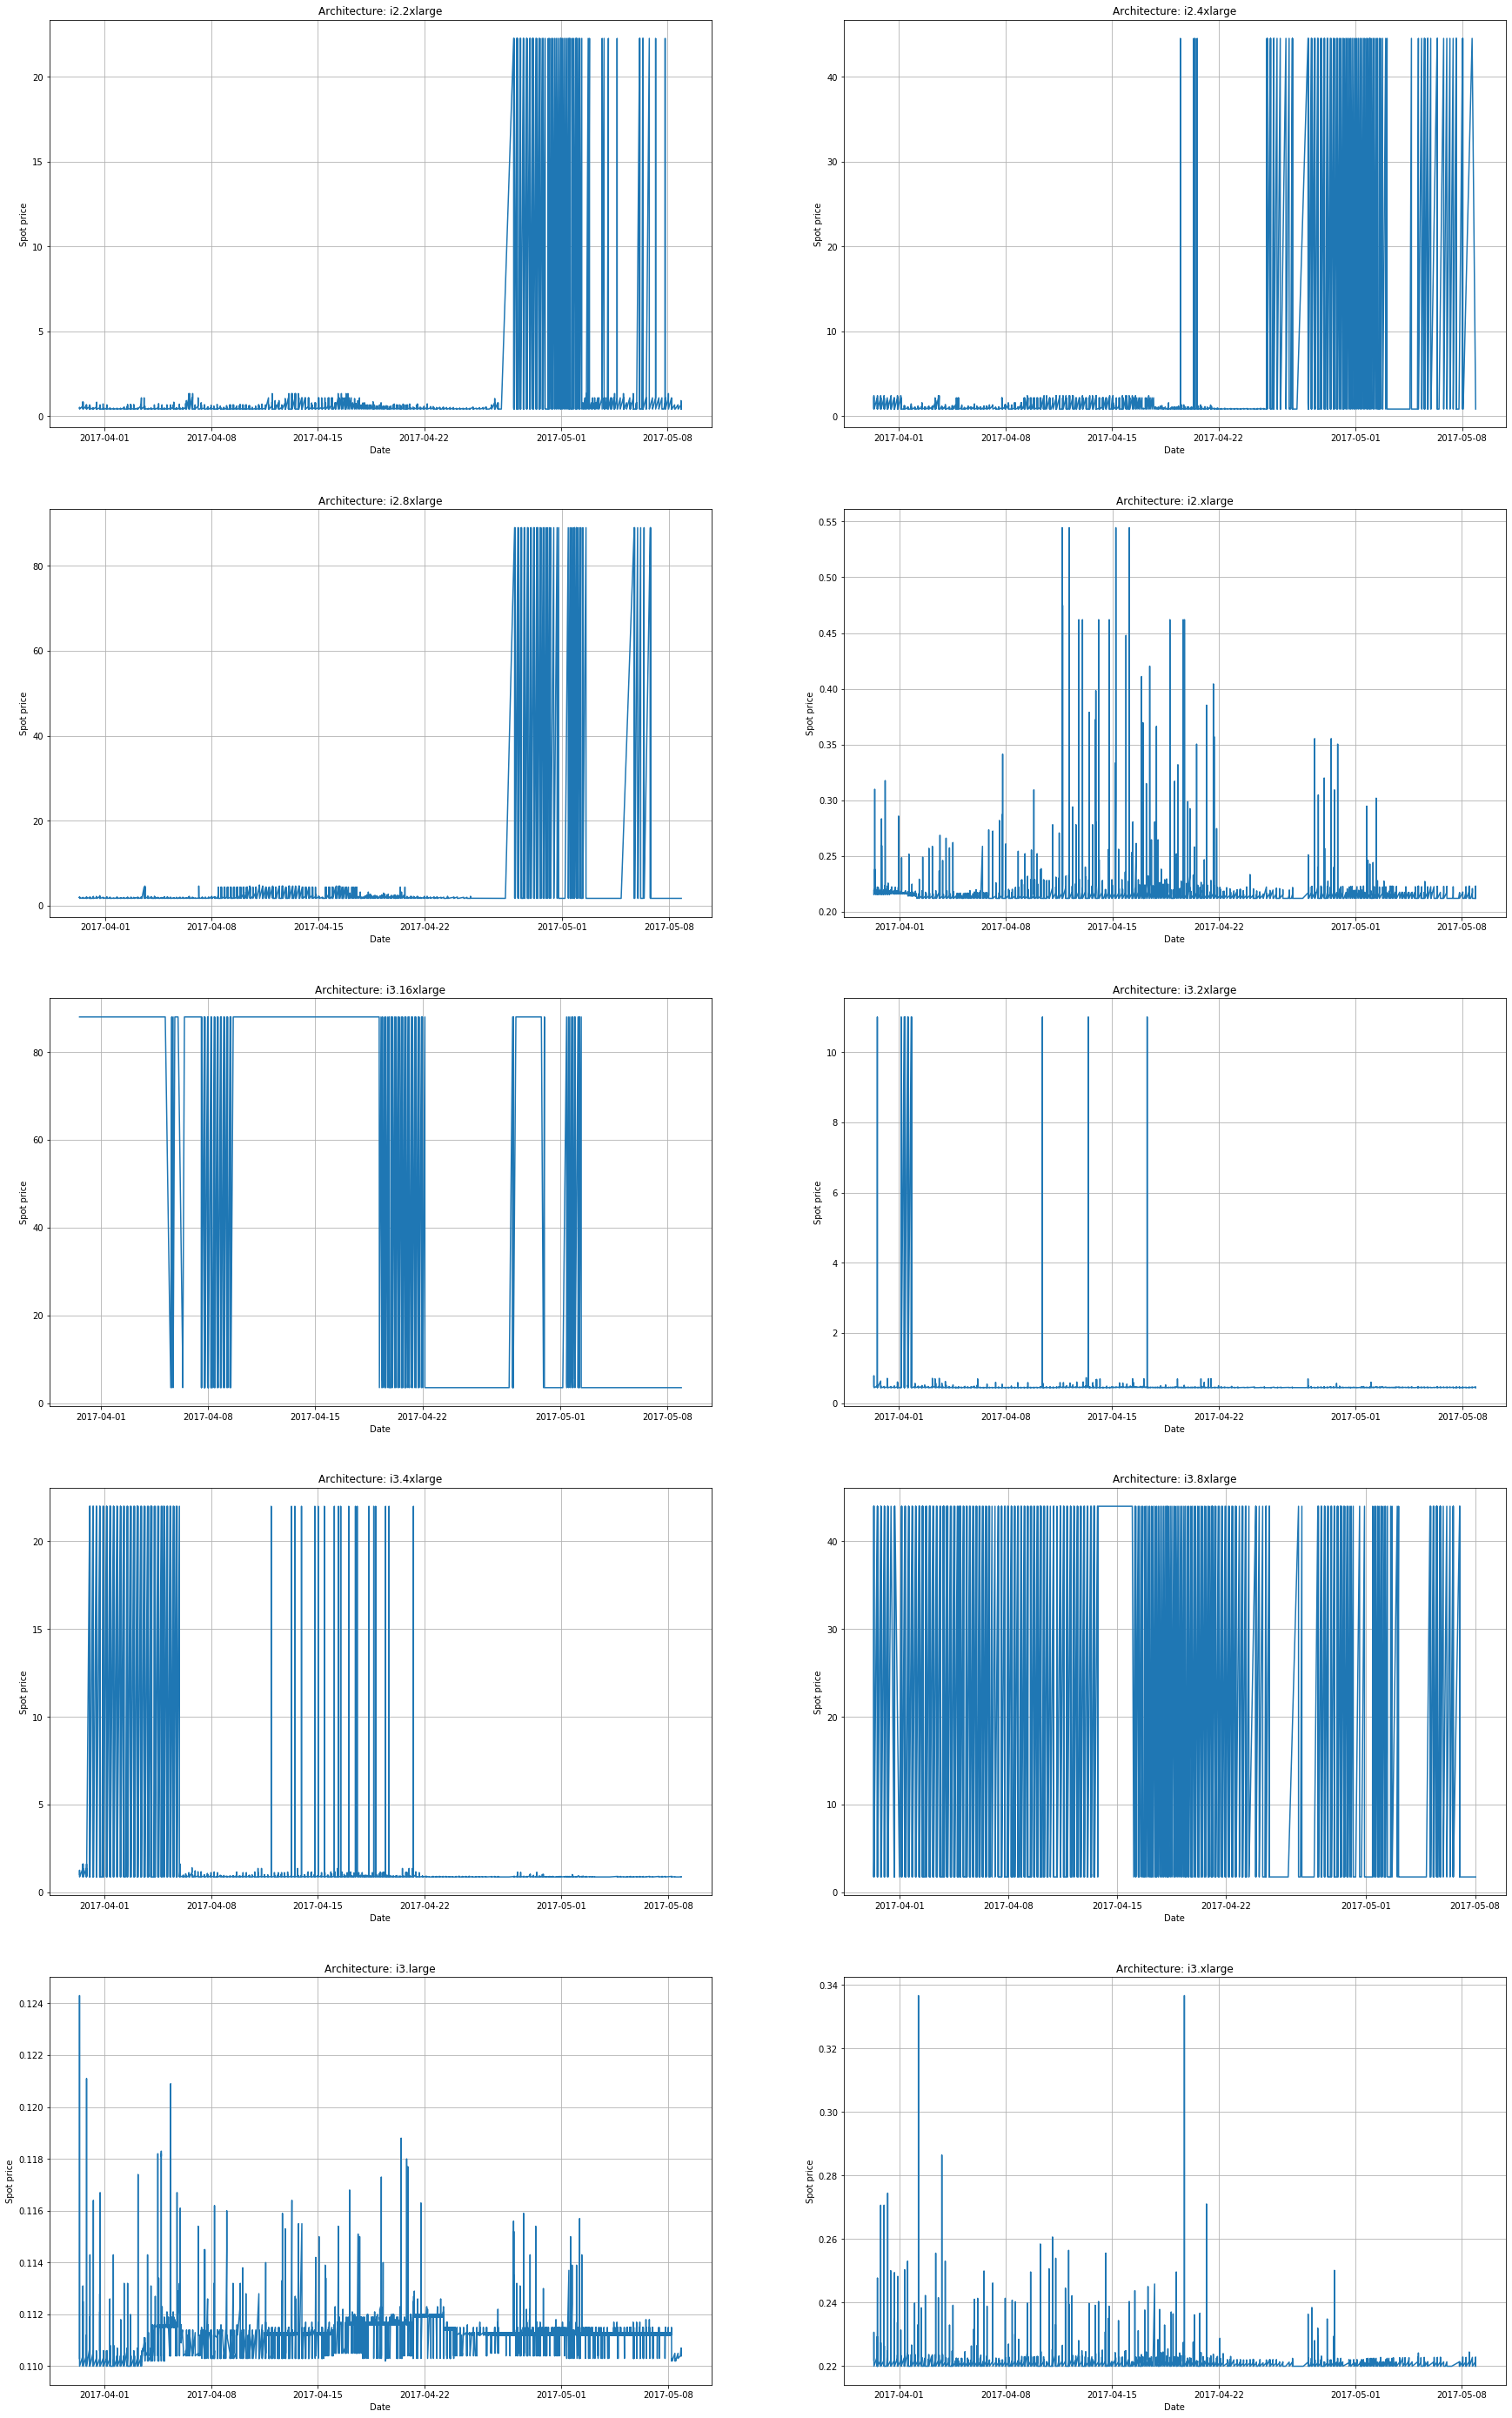

In [35]:
cmap = get_cmap(len(data))

fig, axes = plt.subplots(5,2, figsize=(30,50))
cnt = 0
for key, data in df.groupby("arch"):
    row = cnt // 2
    column = cnt % 2
    axes[row, column].plot(data["dt"], data["price"])
    axes[row, column].set_title("Architecture: "+key)
    axes[row, column].set_xlabel("Date")
    axes[row, column].set_ylabel("Spot price")
    axes[row, column].grid()
    cnt += 1
plt.show()